In [2]:
import mne

In [22]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-filt_raw.fif"


raw = mne.io.read_raw_fif(p)

Opening raw data file /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-filt_raw.fif...
    Range : 0 ... 1360483 =      0.000 ...  5441.932 secs
Ready.


In [23]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-icafit_epo.fif"


epoch = mne.read_epochs(p)

Reading /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-icafit_epo.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
    Found the data of interest:
        t =       0.00 ...     500.00 ms
        0 CTF compensation matrices available
Not setting metadata
5440 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 1)
1 projection items activated


In [27]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-ica_ica.fif"


raw = mne.preprocessing.read_ica(p)

Reading /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-ica_ica.fif ...
    Read a total of 1 projection items:
        Average EEG reference (1 x 66)  idle
Now restoring ICA solution ...
Ready.


Using matplotlib as 2D backend.


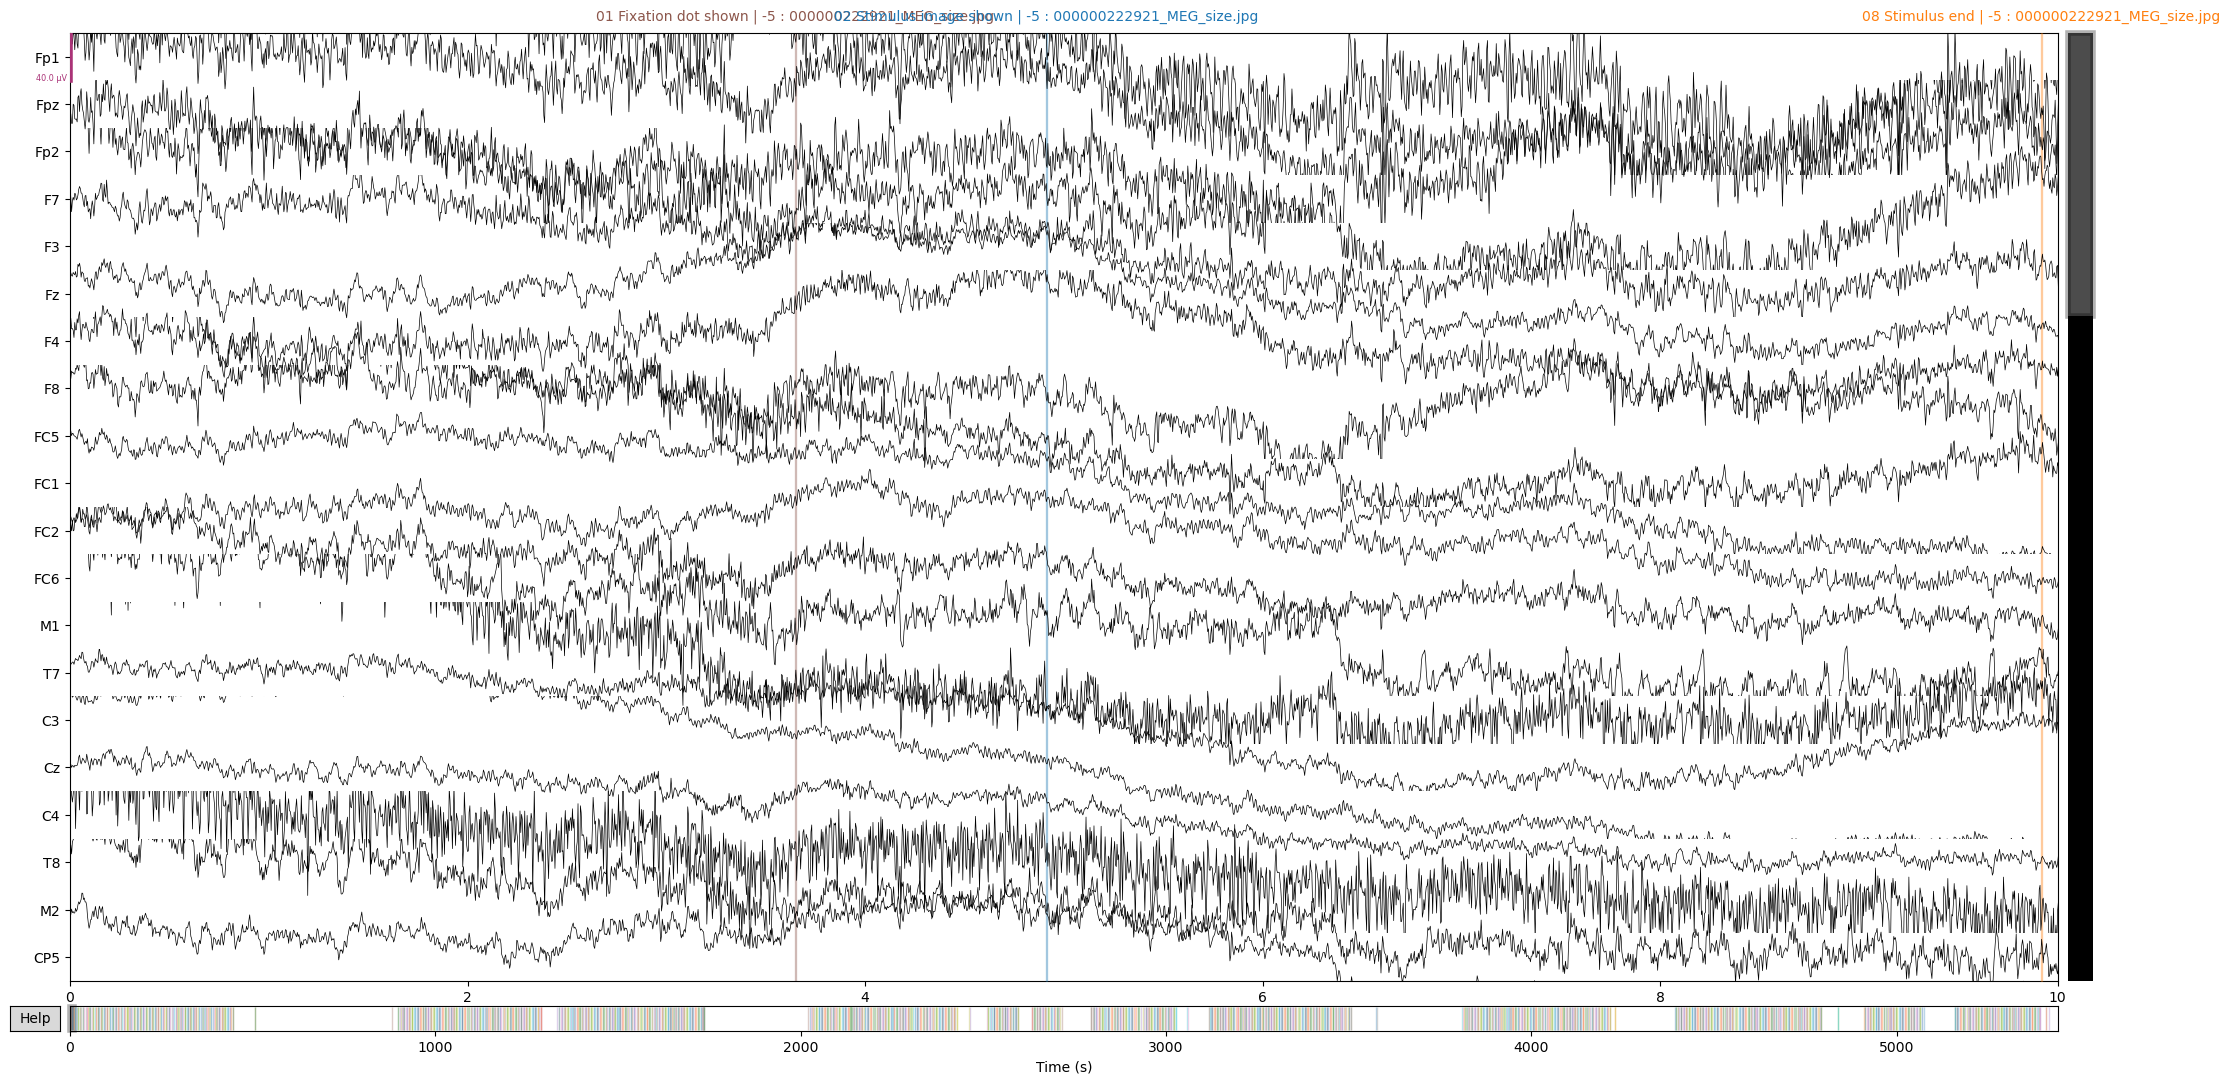

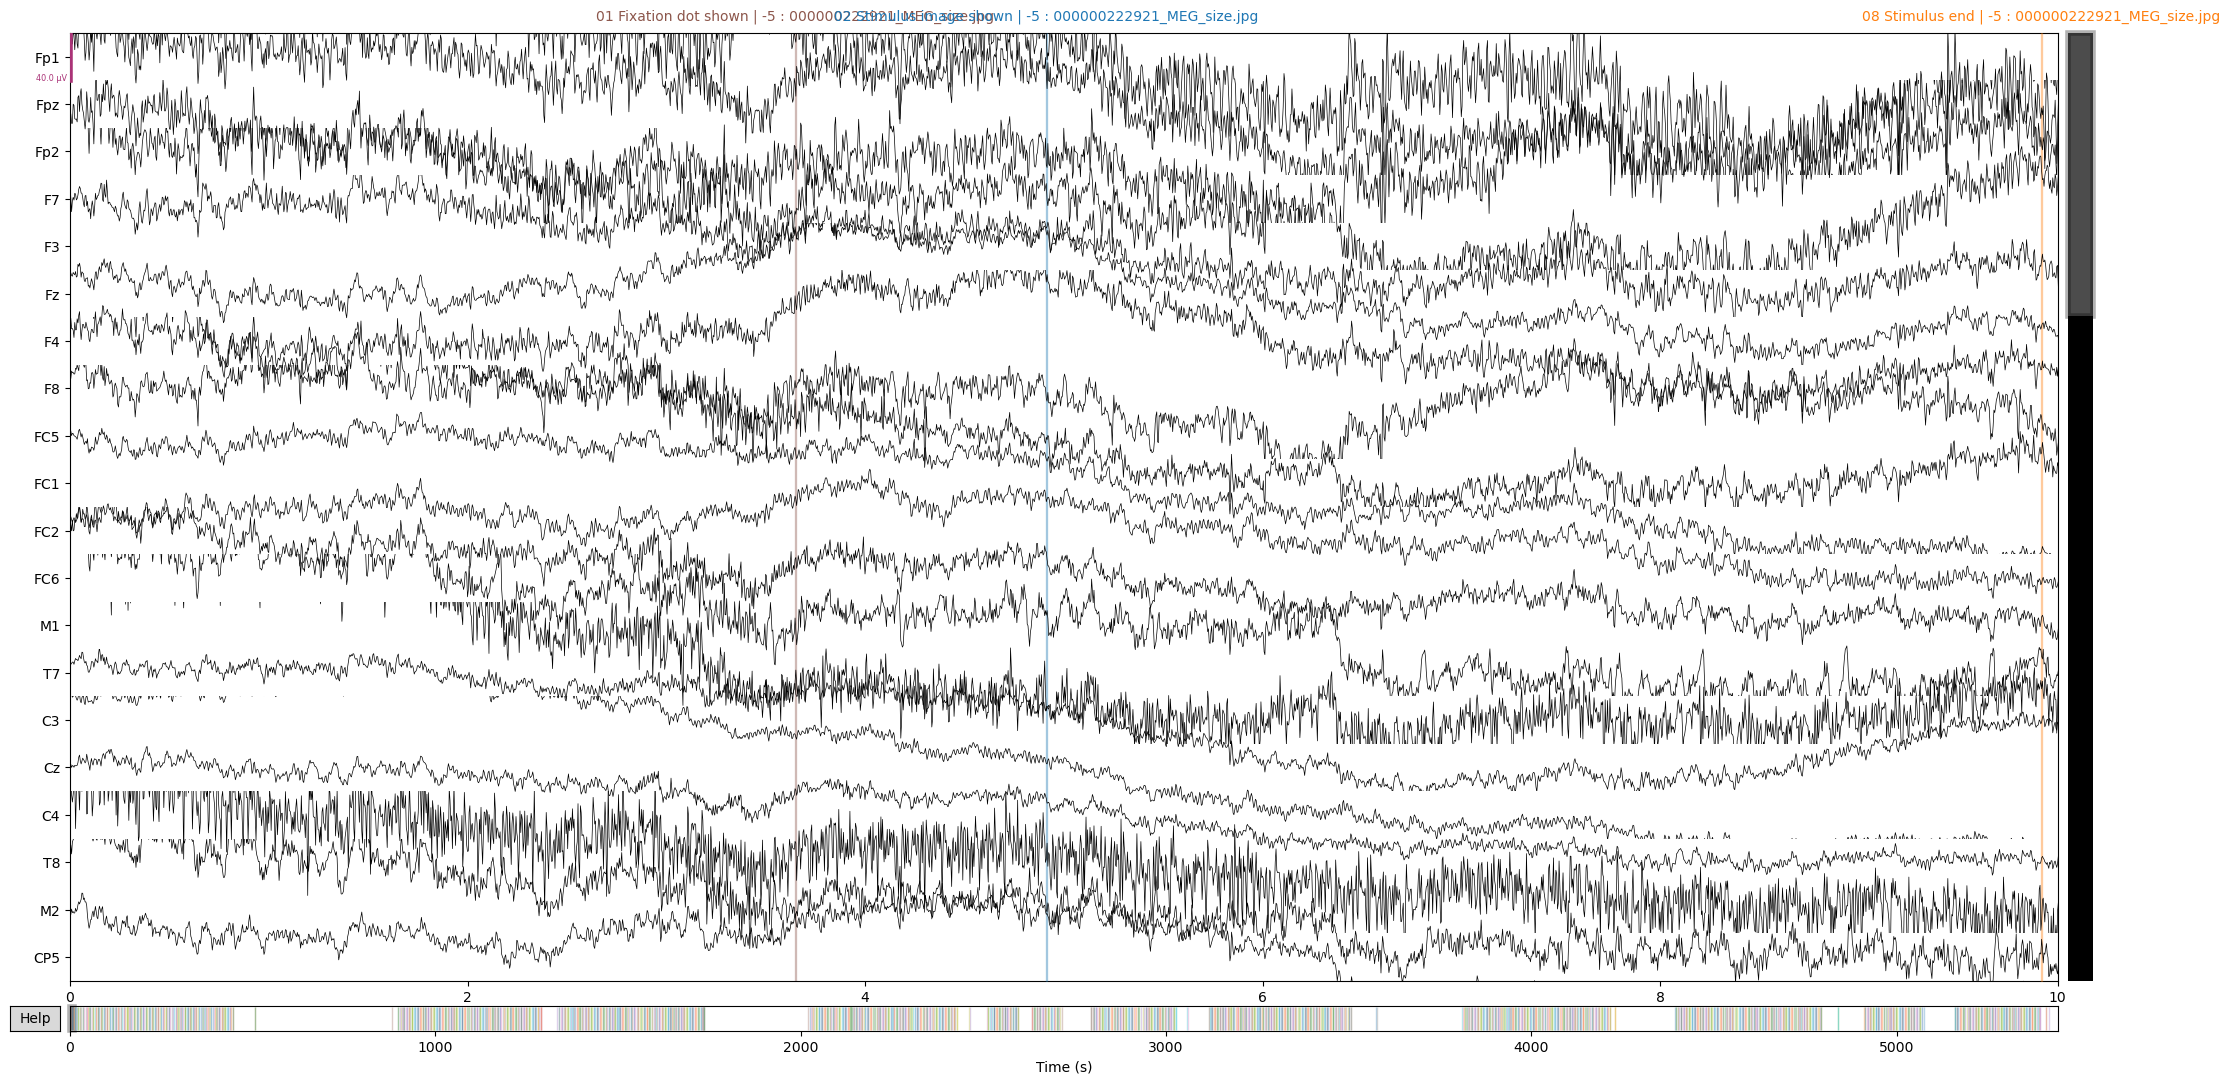

In [13]:
raw.plot()

In [109]:
p = "/scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif"


et = mne.io.read_raw_fif(p,preload=True)
et

Opening raw data file /scratch/data/2024FreeViewingMSCOCO_pilot/derivatives/mne-bids-pipeline/sub-001/ses-001/eeg/sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif...
    Range : 481 ... 1360483 =      1.924 ...  5441.932 secs
Ready.
Reading 0 ... 1360002  =      0.000 ...  5440.008 secs...


<Raw | sub-001_ses-001_task-2024FreeViewingMSCOCO_proc-syncET_raw.fif, 70 x 1360003 (5440.0 s), ~726.4 MB, data loaded>

In [159]:
et.ch_names

['Fp1',
 'Fpz',
 'Fp2',
 'F7',
 'F3',
 'Fz',
 'F4',
 'F8',
 'FC5',
 'FC1',
 'FC2',
 'FC6',
 'M1',
 'T7',
 'C3',
 'Cz',
 'C4',
 'T8',
 'M2',
 'CP5',
 'CP1',
 'CP2',
 'CP6',
 'P7',
 'P3',
 'Pz',
 'P4',
 'P8',
 'POz',
 'O1',
 'O2',
 'HEOGR',
 'AF7',
 'AF3',
 'AF4',
 'AF8',
 'F5',
 'F1',
 'F2',
 'F6',
 'FC3',
 'FCz',
 'FC4',
 'C5',
 'C1',
 'C2',
 'C6',
 'CP3',
 'CP4',
 'P5',
 'P1',
 'P2',
 'P6',
 'HEOGL',
 'PO3',
 'PO4',
 'VEOGU',
 'FT7',
 'FT8',
 'TP7',
 'TP8',
 'PO7',
 'PO8',
 'VEOGL',
 'xpos_left',
 'ypos_left',
 'pupil_left',
 'xpos_right',
 'ypos_right',
 'pupil_right']

In [203]:
raw_et = mne.io.read_raw_eyelink("/scratch/data/2024FreeViewingMSCOCO_pilot/sub-001/ses-001/beh/sub-001_ses-001_task-2024FreeViewingMSCOCO_et.asc")
et.annotations.rename({"BAD_blink":"blink"})


Loading /scratch/data/2024FreeViewingMSCOCO_pilot/sub-001/ses-001/beh/sub-001_ses-001_task-2024FreeViewingMSCOCO_et.asc
Pixel coordinate data detected.Pass `scalings=dict(eyegaze=1e3)` when using plot method to make traces more legible.
Pupil-size area detected.


In [49]:
from matplotlib import pyplot as plt

In [ ]:
mne.io.read_raw_eyelink

In [202]:
evt = mne.events_from_annotations(et,regexp="blink")
epochs = mne.Epochs(et,evt[0],event_id=evt[1],tmin=-0.1,tmax=0.5,event_repeated="merge",baseline=None)
#evt

ValueError: Invalid Annotation description(s) {'BAD_blink'} is not present in data

In [192]:
epochs.copy().plot_image(picks="Fp1",vmin=-20,vmax=20)

Using data from preloaded Raw for 1128 events and 151 original time points ...


ValueError: could not convert string to float: 'BAD_blink'